<a href="https://colab.research.google.com/github/aekamban/Portfolio/blob/main/Climate_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Climate Data Exploration**

-----------------------------
## **Context**
-----------------------------

Climate patterns play a vital role in shaping our environment, impacting everything from ecosystems to human activity. Coastal and inland regions often experience distinct weather phenomena due to their proximity to large water bodies and elevation differences. Understanding these patterns is critical for resource management, urban planning, and climate adaptation strategies. Over the past decade, rising global temperatures and shifting precipitation trends have further underscored the importance of analyzing localized climate data.

In this case study, we will explore and visualize the Global Surface Summary of the Day (GSOD) dataset provided by NOAA. This dataset allows us to study how temperature and precipitation differ between coastal and inland regions in the Northeastern United States over the past decade (2013–2023).

-----------------------------
## **Objective**
-----------------------------

The objective of this analysis is to use statistical and visual techniques to:

- Identify significant differences in temperature and precipitation trends between coastal and inland regions.
- Examine seasonal variations in weather patterns and their geographic implications.
- Provide actionable insights that contribute to regional climate adaptation and mitigation strategies.

-----------------------------
## **Dataset**
-----------------------------
This dataset includes daily weather observations from thousands of stations worldwide, narrowed down to four key stations in the Northeastern United States: two coastal and two inland. It spans a decade (2013–2023) and contains continuous variables such as:

- Temperature: Daily mean temperature (°F)
- Precipitation: Total daily precipitation (inches)
- Wind Speed: Average daily wind speed (miles/hour)

The dataset also includes metadata, such as station location (latitude and longitude), elevation, geographic classification (coastal or inland), and seasonal classification (winter, spring, summer, or fall). These features will allow us to conduct a comparative analysis of climate patterns in coastal vs. inland regions.

## **Importing libraries and overview of the dataset**

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

**Let's get an overview of the data and prepare it for visualization**

In [ ]:
# Import the necessary library
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the CSV file
file_path = '/content/drive/MyDrive/ClimateData.csv'  # Replace with your file path

# Loading the data
data_climate = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_climate.head()

NAME      STATION LOCATION      DATE  SEASON  \
0         UNIVERSITY PARK, PA US  72512854739   Inland  1/1/2013  Winter   
1         MONTAUK AIRPORT, NY US  72501454780  Coastal  1/1/2013  Winter   
2  ROME GRIFFISS AIRFIELD, NY US  72519664775   Inland  1/1/2013  Winter   
3           ATLANTIC CITY, NJ US  99727099999  Coastal  1/1/2013  Winter   
4  ROME GRIFFISS AIRFIELD, NY US  72519664775   Inland  1/2/2013  Winter   

    LATITUDE  LONGITUDE  ELEVATION  TEMP  WDSP  PRCP  
0  40.850000 -77.850000      377.6  31.8  10.8   NaN  
1  41.073056 -71.923505        2.0  39.1  11.5  0.00  
2  43.224170 -75.395630      144.7  25.7  11.7  0.01  
3  39.350000 -74.420000       10.0  42.3   NaN  0.00  
4  43.224170 -75.395630      144.7  12.1   4.5  0.01

**Checking the info of the data**

In [ ]:
data_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13761 entries, 0 to 13760
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NAME       13761 non-null  object 
 1   STATION    13761 non-null  int64  
 2   LOCATION   13761 non-null  object 
 3   DATE       13761 non-null  object 
 4   SEASON     13761 non-null  object 
 5   LATITUDE   13761 non-null  float64
 6   LONGITUDE  13761 non-null  float64
 7   ELEVATION  13761 non-null  float64
 8   TEMP       13761 non-null  float64
 9   WDSP       12990 non-null  float64
 10  PRCP       12297 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


**Observations:**

- There are **13,761 observations and 11 columns** in the data.
- **All the columns except Name, Location, Date, and Season are of numeric data type**.
- Name, Location, Date, and Season are of object data type. We can create **dummy variables** for each category and convert it to numeric data type.
- The windspeed and precipitation **columns have some missing values**.
- Let's **check the number of missing values** in each column.

In [ ]:
data_climate.isnull().sum()

NAME            0
STATION         0
LOCATION        0
DATE            0
SEASON          0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
TEMP            0
WDSP          771
PRCP         1464
dtype: int64

**Observations:**

- All the columns except windspeed and precipitation have no missing values.
- We will impute (fill in) the missing values by using the median for the skewed numerical variables and the mean for the non-skewed numerical variables.

## **Data Preprocessing and Exploratory Data Analysis**

In [ ]:
# Dropping the columns - SrNo and Date
data_climate.drop(columns = ["STATION"], inplace = True)

Removed because they do not add value as they have a unique value for each row

### **Summary Statistics**

In [ ]:
data_climate.describe().T

count        mean         std    min    25%         50%  \
LATITUDE   13761.0   41.176501    1.367513  39.35  40.85   41.073056   
LONGITUDE  13761.0  -74.912624    2.152900 -77.85 -77.85  -75.395630   
ELEVATION  13761.0  137.285648  152.603842   2.00   2.00  144.700000   
TEMP       13761.0   52.381716   17.084201 -13.20  39.30   53.300000   
WDSP       12990.0    4.715150    3.615677   0.00   2.00    4.500000   
PRCP       12297.0    0.076989    0.239127   0.00   0.00    0.000000   

                  75%         max  
LATITUDE    43.224170   43.224170  
LONGITUDE  -71.923505  -71.923505  
ELEVATION  377.600000  377.600000  
TEMP        67.600000   84.800000  
WDSP         6.900000   23.800000  
PRCP         0.010000    3.420000

**Observations:**

- The mean temperature (TEMP) is approximately 52.38°F, which falls within a moderate range, but the standard deviation of 17.08°F indicates significant variability in daily temperatures, reflecting seasonal differences. The temperature ranges from an extreme low of -13.2°F to a high of 84.8°F, showing the stark contrasts typical of the Northeastern United States.

- Precipitation (PRCP) has a mean of 0.077 inches, with a highly skewed distribution, as the median and 75th percentile values are both close to 0.01 inches, while the maximum reaches 3.42 inches. This suggests that most days have minimal or no precipitation, but occasional heavy rain events occur, likely contributing to seasonal peaks.

- The mean wind speed (WDSP) is 4.72 mph, with a maximum of 23.8 mph, and a standard deviation of 3.62 mph. This indicates that while most days have low to moderate wind speeds, there are occasional strong wind events that might correspond to storms or other weather phenomena.

- Latitude and longitude values confirm that the data covers a region in the Northeastern U.S., with latitude centering around 41.18°N and longitude around -74.91°W. The geographic spread is narrow, which is consistent with the study's focus on a regional comparison.

- Elevation ranges from 2 meters to 377.6 meters, with a median of 144.7 meters. This reflects that the inland stations are at higher elevations compared to coastal ones, potentially influencing temperature and precipitation patterns.

- The distribution of precipitation and other variables suggests potential outliers, especially with maximum values that are far removed from the interquartile range (e.g., PRCP = 3.42 inches and WDSP = 23.8 mph). These outliers might represent extreme weather events and will be carefully considered in the analysis.

**Let's check the distribution and outliers for numerical columns in the data**

LATITUDE
Skew : 0.32


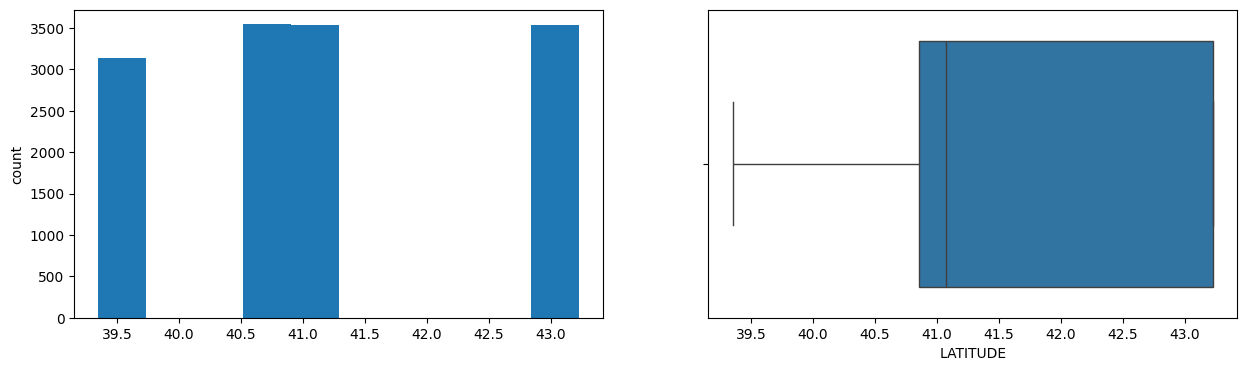

LONGITUDE
Skew : 0.03


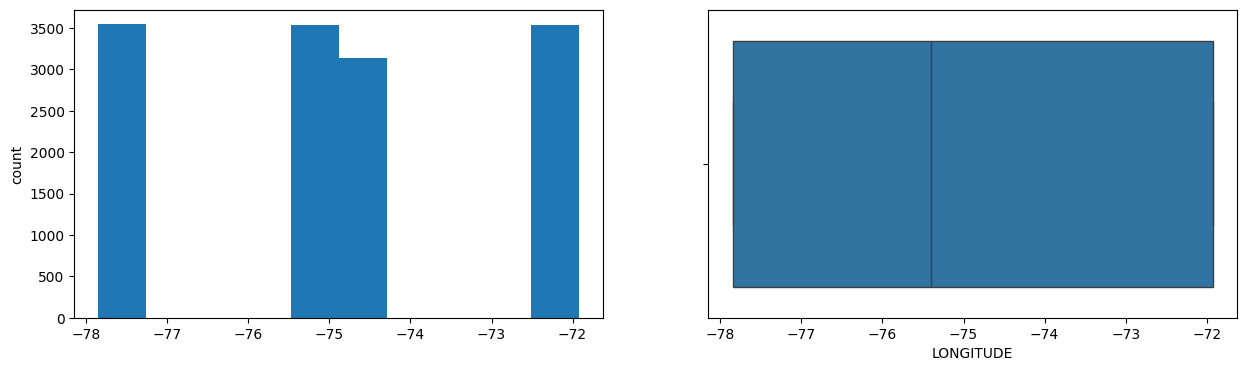

ELEVATION
Skew : 0.69


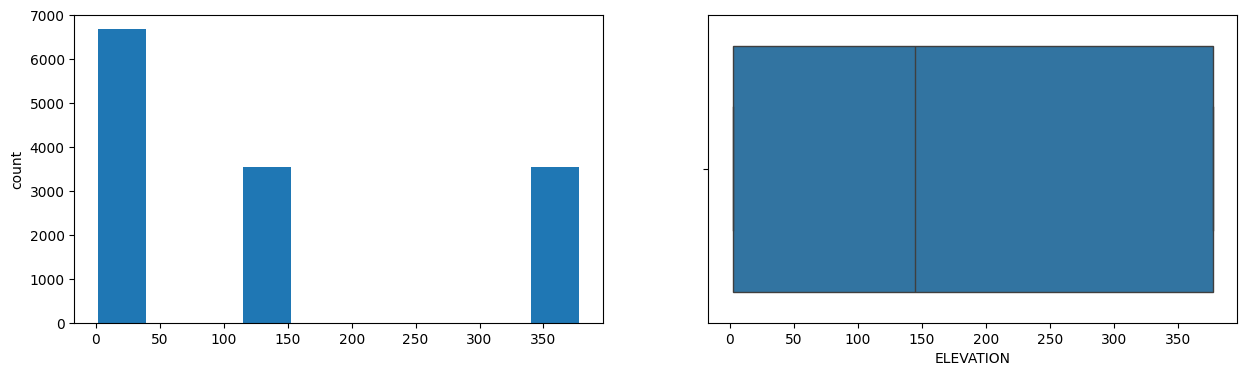

TEMP
Skew : -0.38


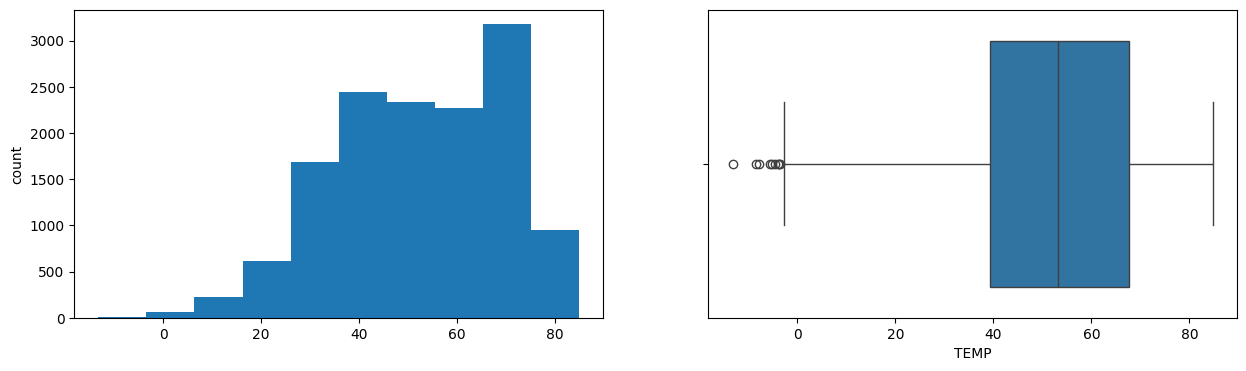

WDSP
Skew : 0.64


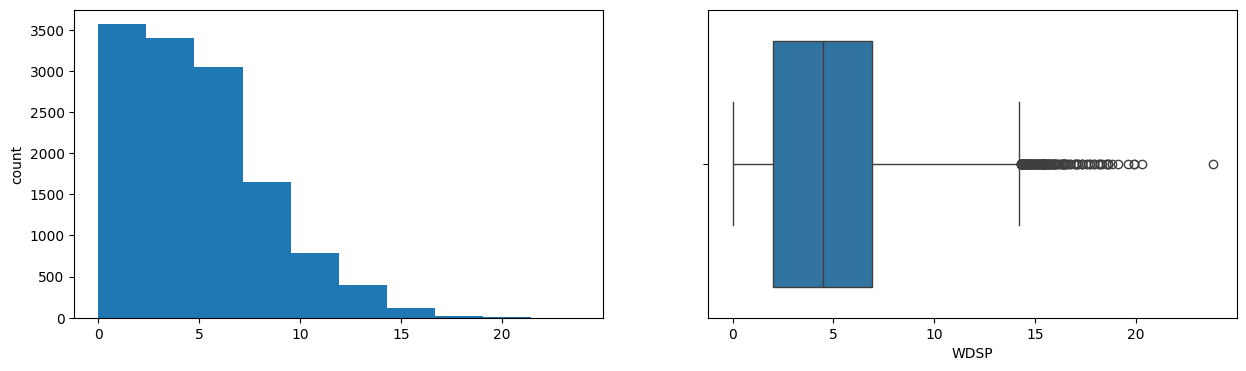

PRCP
Skew : 5.32


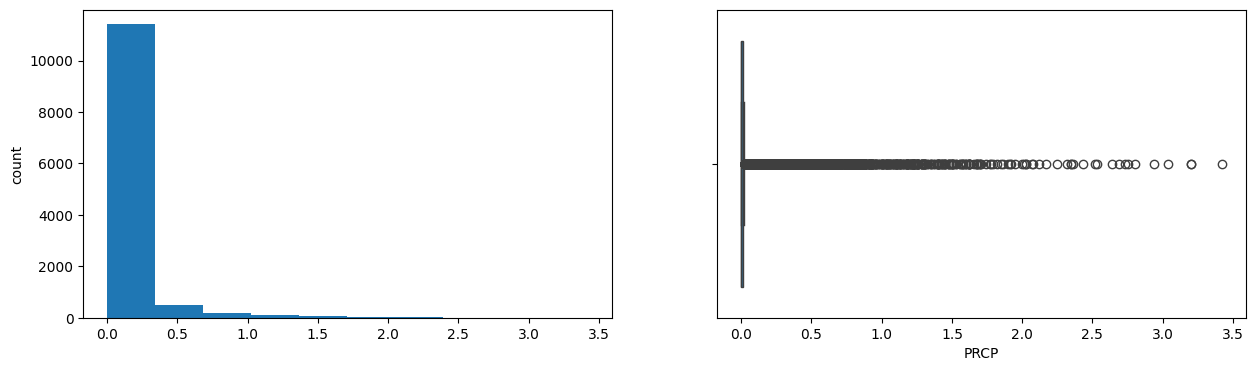

In [ ]:
result = data_climate.select_dtypes(include = 'number')

cont_cols = list(result)

for col in cont_cols:

    print(col)

    print('Skew :',round(data_climate[col].skew(),2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    data_climate[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data_climate[col])

    plt.show()

**Observations:**
- The PRCP (precipitation) variable is highly right-skewed (skewness = 5.32). This indicates that most days have little or no precipitation, while a few days experience heavy rainfall. Outliers in the data are likely driving this skewness, as observed in the distribution plot.

- WDSP (wind speed) has a moderate right skew (skewness = 0.64), suggesting that low wind speeds are more common, with occasional higher wind speeds creating a long tail in the distribution.

- ELEVATION also shows a moderate right skew (skewness = 0.69), reflecting that most stations are at lower elevations, with a smaller number located at higher altitudes.

- The LATITUDE and LONGITUDE variables exhibit minimal skewness (0.32 and 0.03, respectively), indicating that the data points are fairly symmetrically distributed geographically across the study region in the Northeastern U.S.

- TEMP (temperature) is slightly left-skewed (skewness = -0.38), which implies that higher temperatures are slightly more common than very low temperatures, likely reflecting seasonal warmth during the summer months.

- The overall skewness values for most variables are within a moderate range, except for PRCP, which demonstrates significant skewness due to rare but intense precipitation events. This highlights the importance of considering transformations or additional analysis techniques to account for these extreme values.

**Now, let's check the correlation among different variables**

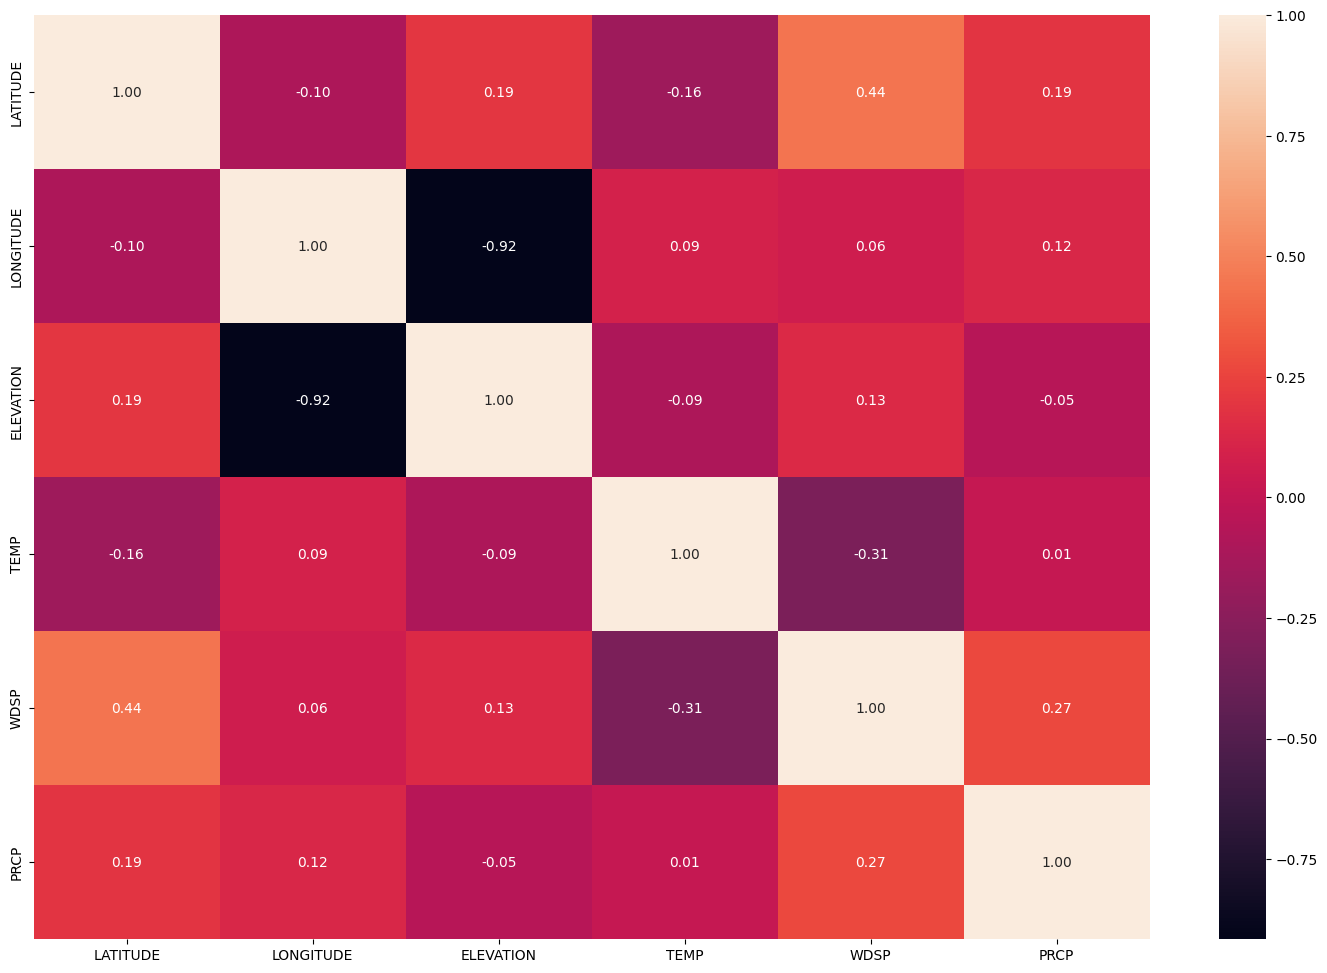

In [ ]:
plt.figure(figsize = (18, 12))

sns.heatmap(data_climate.corr(numeric_only = True), annot = True, fmt = '0.2f')

plt.show()

**Observations:**

1. High negative correlation:

- ELEVATION and LONGITUDE show a strong negative correlation (-0.92). This indicates that as elevation increases, longitude decreases or vice versa, suggesting geographical alignment in the dataset.

2. Moderate positive correlation:

- LATITUDE and WDSP (Wind Speed) are positively correlated (0.44), indicating that wind speed increases at higher latitudes.
- WDSP and PRCP (Precipitation) have a moderate positive correlation (0.27), suggesting higher wind speeds may be associated with increased precipitation.

3. Weak correlations:

- TEMP (Temperature) and WDSP show a weak negative correlation (-0.31). This could indicate that wind speed tends to be higher when temperatures are slightly lower.
- TEMP and PRCP show almost no correlation (0.01), suggesting temperature has little to no direct relationship with precipitation in this dataset.
- PRCP has weak correlations with most other features, except WDSP.

4. General Insights:

- ELEVATION has weak or no significant correlation with other features except LONGITUDE.
- The variables show minimal to moderate correlations, implying limited linear relationships among the features apart from the strong geographical trend between elevation and longitude.

These observations highlight that while there are few significant correlations, geographic and meteorological factors (latitude, wind speed, and elevation) appear to drive most of the relationships.

### **Data Preprocessing**

I will replace the missing data for precipitation (PRCP) with the median because precipitation values are highly skewed, as indicated by the high positive skewness (5.32). The median is less sensitive to outliers and better represents the central tendency for skewed data. For wind speed (WDSP), I will use the mean because its distribution is closer to normal, making the mean an appropriate measure to preserve the overall characteristics of the data.

In [ ]:
# Imputing missing values with mean for the windspeed column and with median for the precipitation column
fill_values = {
    "WDSP": data_climate["WDSP"].mean(),
    "PRCP": data_climate["PRCP"].median()
}

data_climate.fillna(value=fill_values, inplace=True)

In [ ]:
# Creating dummy variables for categorical data columns
# List of categorical columns
categorical_columns = ['NAME', 'LOCATION', 'DATE', 'SEASON']

# Create dummy variables for the categorical columns
data_climate_dummies = pd.get_dummies(data_climate, columns=categorical_columns, drop_first=True)

# Display the first few rows of the updated dataset
print(data_climate_dummies.head())

    LATITUDE  LONGITUDE  ELEVATION  TEMP      WDSP  PRCP  \
0  40.850000 -77.850000      377.6  31.8  10.80000  0.00   
1  41.073056 -71.923505        2.0  39.1  11.50000  0.00   
2  43.224170 -75.395630      144.7  25.7  11.70000  0.01   
3  39.350000 -74.420000       10.0  42.3   4.71515  0.00   
4  43.224170 -75.395630      144.7  12.1   4.50000  0.01   

   NAME_MONTAUK AIRPORT, NY US  NAME_ROME GRIFFISS AIRFIELD, NY US  \
0                        False                               False   
1                         True                               False   
2                        False                                True   
3                        False                               False   
4                        False                                True   

   NAME_UNIVERSITY PARK, PA US  LOCATION_Inland  ...  DATE_9/9/2017  \
0                         True             True  ...          False   
1                        False            False  ...          False   
2    

#### **Scaling the data**

In [ ]:
#Scale the dataset
scaler = StandardScaler()

# Apply scaling to the numeric dataset (dummy variables included)
data_climate_scaled = scaler.fit_transform(data_climate_dummies)

# Convert the scaled data bacl to a DataFrame
data_climate_scaled_df = pd.DataFrame(data_climate_scaled, columns=data_climate_dummies.columns)

# Display the first few rows of the scaled dataset
print(data_climate_scaled_df.head())

   LATITUDE  LONGITUDE  ELEVATION      TEMP      WDSP      PRCP  \
0 -0.238764  -1.364430   1.574817 -1.204766  1.732197 -0.302698   
1 -0.075647   1.388466  -0.886548 -0.777455  1.931469 -0.302698   
2  1.497422  -0.224359   0.048587 -1.561834  1.988404 -0.258700   
3 -1.335686   0.228827  -0.834122 -0.590141  0.000000 -0.302698   
4  1.497422  -0.224359   0.048587 -2.357920 -0.061248 -0.258700   

   NAME_MONTAUK AIRPORT, NY US  NAME_ROME GRIFFISS AIRFIELD, NY US  \
0                    -0.588288                           -0.588735   
1                     1.699849                           -0.588735   
2                    -0.588288                            1.698556   
3                    -0.588288                           -0.588735   
4                    -0.588288                            1.698556   

   NAME_UNIVERSITY PARK, PA US  LOCATION_Inland  ...  DATE_9/9/2017  \
0                     1.697911         0.970566  ...      -0.017052   
1                    -0.588959    

## **Principal Component Analysis**

In [ ]:
# Defining the number of principal components to generate
n = data_climate_scaled.shape[1]

# Finding principal components for the data
pca1 = PCA(n_components = n, random_state = 1)
data_climate_pca = pd.DataFrame(pca1.fit_transform(data_climate_scaled))

# The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

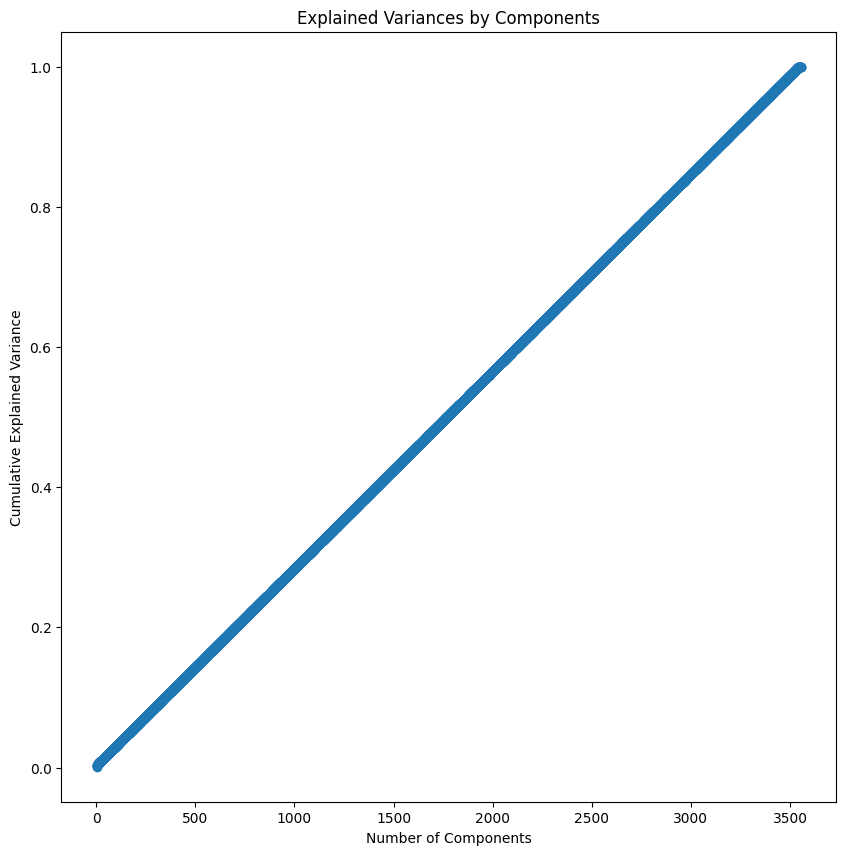

In [ ]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

# Change the x-axis data to match the length of the y-axis data
plt.plot(range(1, len(pca1.explained_variance_ratio_) + 1), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

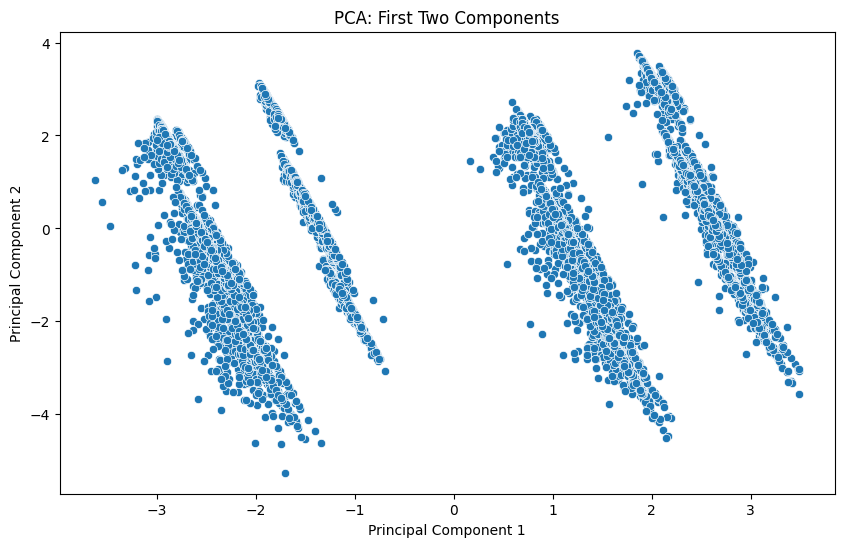

In [ ]:
# Use the first two principal components
plt.figure(figsize=(10, 6))
# Use data_climate_pca and access the first two components using their column indices
sns.scatterplot(x=data_climate_pca[0], y=data_climate_pca[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Components')
plt.show()

In [ ]:
# Find the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var1):

    sum = sum + i

    if(sum>0.70):
        print("Number of principal components that explain at least 70% variance: ", ix + 1)
        break

Number of principal components that explain at least 70% variance:  2479


<ipython-input-52-6904946cc0c7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['Cluster'] = kmeans.labels_ # Assign labels as a new column instead of a row


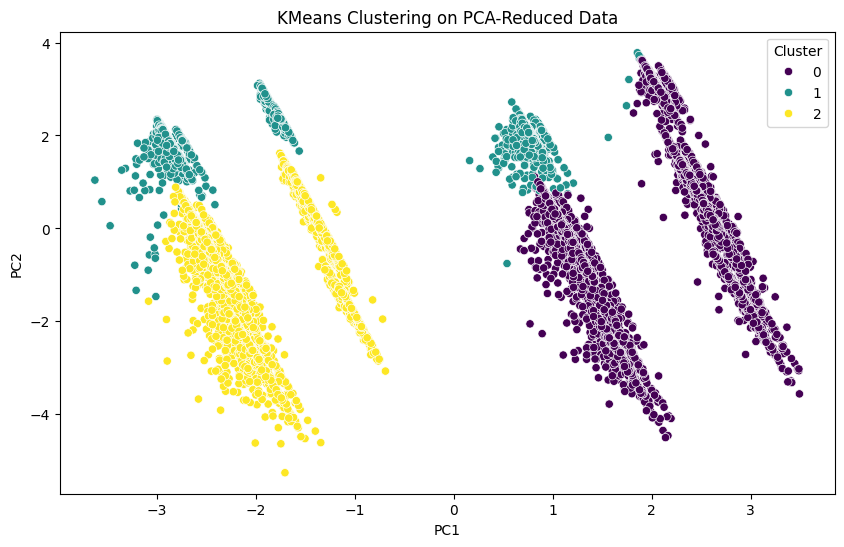

In [ ]:
from sklearn.cluster import KMeans

# Using the first 5 principal components
reduced_df = data_climate_pca[[0, 1, 2, 3, 4]]
reduced_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'] #Rename columns for better readability

# Fit KMeans clustering on the reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(reduced_df)

# Add cluster labels to the reduced data as a new column
reduced_df['Cluster'] = kmeans.labels_ # Assign labels as a new column instead of a row

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=reduced_df, palette='viridis')
plt.title('KMeans Clustering on PCA-Reduced Data')
plt.show()

In [ ]:
# Making a new dataframe with first 5 principal components as columns and original features as indices
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

# Use the columns from the original DataFrame before scaling
pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:5], 2), index = data_climate_dummies.columns, columns = cols)
pc1

PC1   PC2   PC3   PC4   PC5
LATITUDE       0.20 -0.10  0.50 -0.17 -0.17
LONGITUDE     -0.46 -0.13  0.13 -0.04 -0.02
ELEVATION      0.45  0.11 -0.11  0.04  0.17
TEMP          -0.14  0.49  0.09 -0.00  0.06
WDSP           0.08 -0.25  0.28 -0.03  0.41
...             ...   ...   ...   ...   ...
DATE_9/9/2022 -0.00  0.00 -0.00  0.00 -0.01
DATE_9/9/2023 -0.00  0.01 -0.00  0.00 -0.01
SEASON_Spring  0.01 -0.10  0.16  0.59 -0.02
SEASON_Summer -0.06  0.43  0.09 -0.26  0.07
SEASON_Winter  0.06 -0.38 -0.26 -0.33 -0.01

[3556 rows x 5 columns]

**Observations:**

- The first principal component (PC1) seems to capture the geographic influence on the data, as it is heavily weighted by Longitude (-0.46) and Elevation (0.45), with a smaller contribution from Latitude (0.20). This suggests that PC1 represents a spatial trend, possibly separating locations based on their longitude and elevation. Areas with higher elevation tend to have distinct environmental conditions, such as lower temperatures.

- The second principal component (PC2) appears to be related to temperature (TEMP, 0.49) and seasonal effects, particularly SEASON_Summer (0.43) and SEASON_Winter (-0.38). This suggests that PC2 captures temperature variability across different seasons, with higher temperatures linked to summer and lower temperatures to winter.

- The third principal component (PC3) seems to be influenced by Latitude (0.50) and Wind Speed (WDSP, 0.28). This indicates that PC3 may capture latitudinal variations in wind speed, where certain regions (closer to or farther from the equator) may experience distinct wind patterns. This relationship could affect climate conditions and atmospheric mixing.

- The fourth principal component (PC4) appears to highlight seasonal patterns, particularly SEASON_Spring (0.59) and SEASON_Summer (-0.26), as well as a weaker relationship with Latitude (-0.17). This suggests that PC4 represents seasonal shifts, particularly during springtime, when specific geographic factors might influence climate variations.

- The fifth principal component (PC5) is primarily associated with Wind Speed (WDSP, 0.41) and Elevation (0.17), with minor contributions from temperature and seasonality. This indicates that PC5 likely captures the effect of wind speed, which tends to vary based on elevation, and can influence local weather and climate conditions.

## **t-SNE**

Let's try to **visualize the data for different perplexity values**

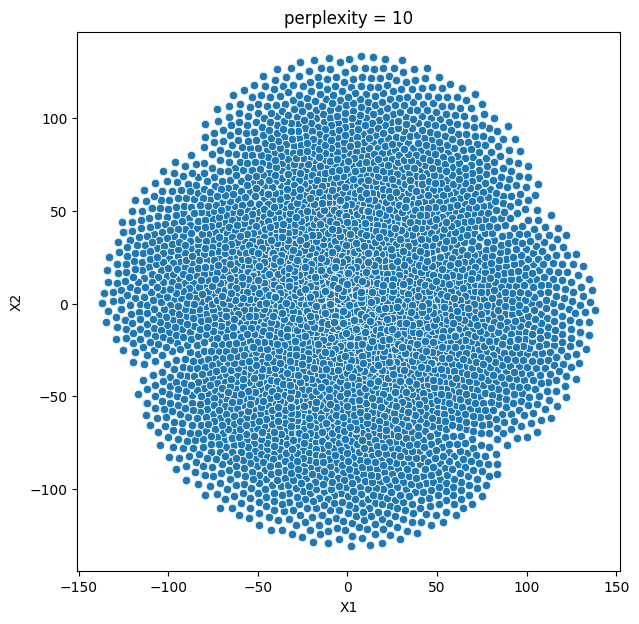

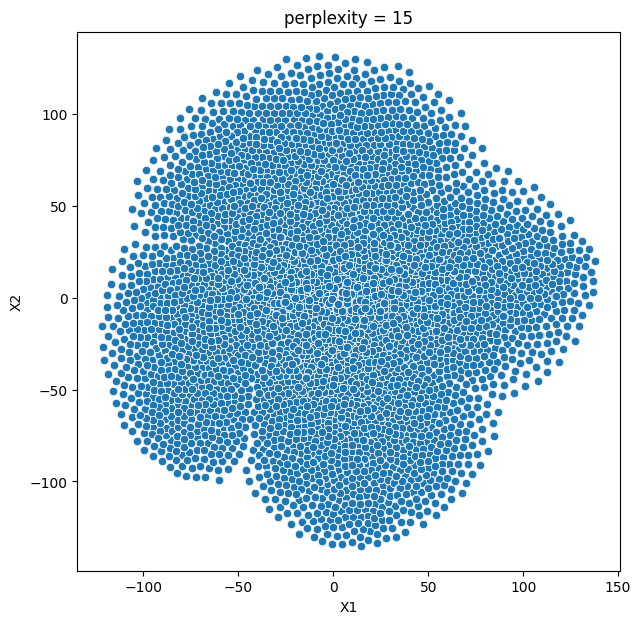

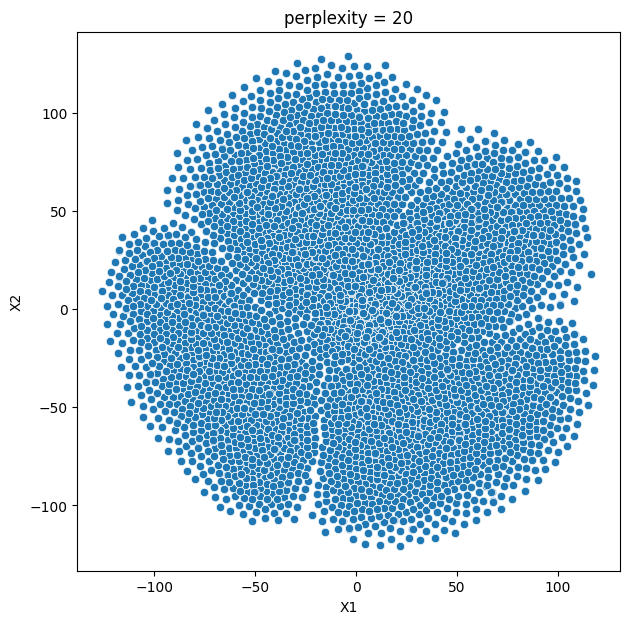

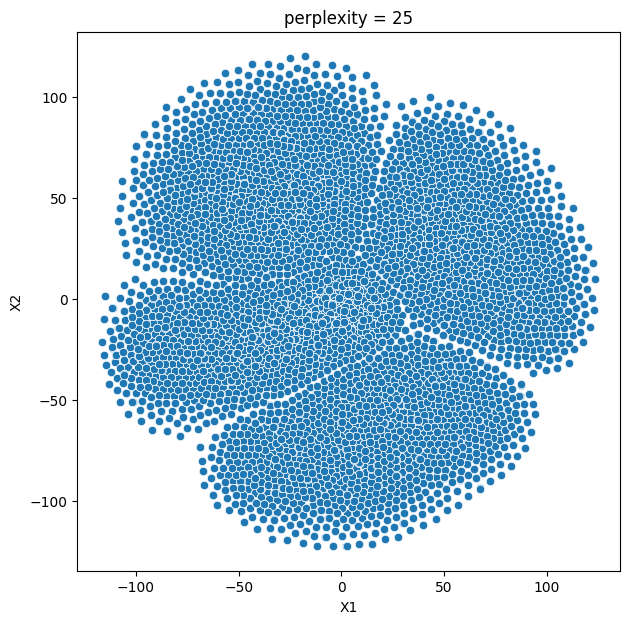

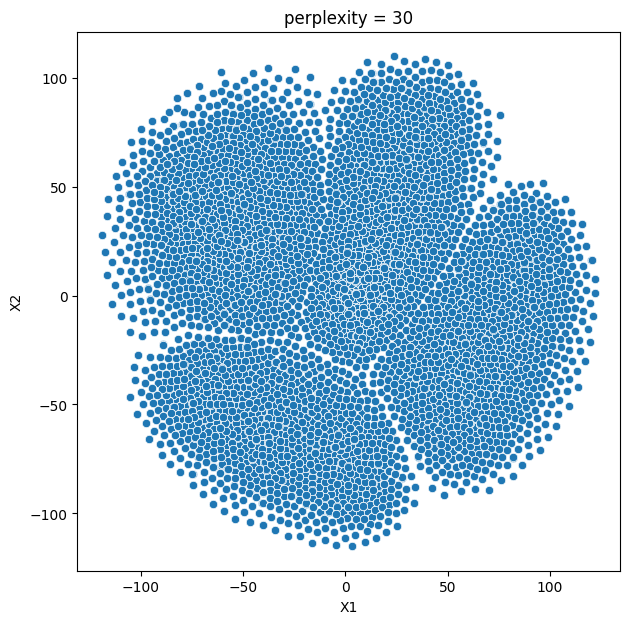

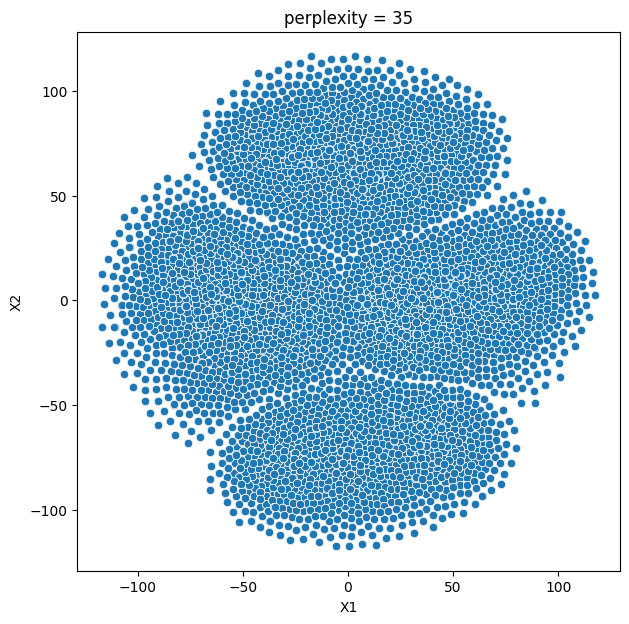

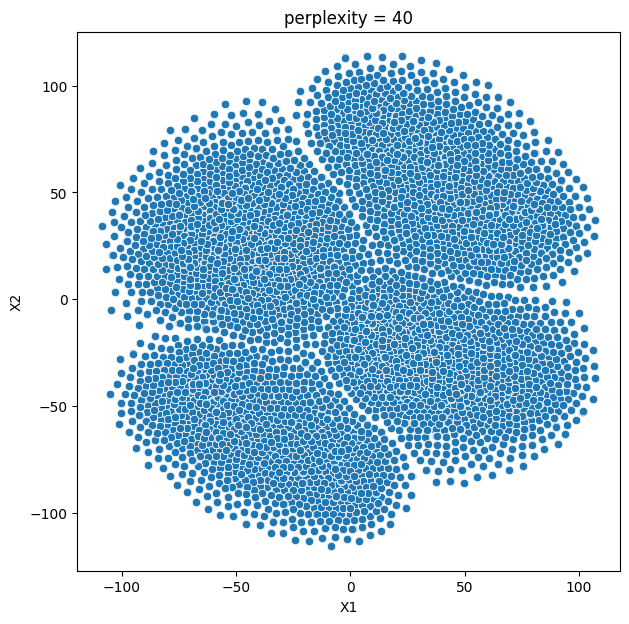

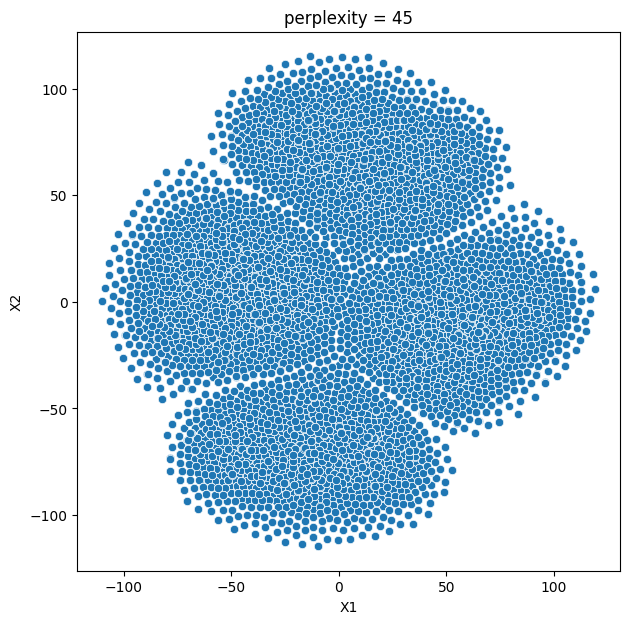

In [ ]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)

    data_climate_tsne = tsne.fit_transform(data_climate_scaled)

    data_climate_tsne = pd.DataFrame(data_climate_tsne)

    data_climate_tsne.columns = ['X1', 'X2']

    plt.figure(figsize = (7,7))

    sns.scatterplot(x = 'X1', y = 'X2', data = data_climate_tsne)

    plt.title("perplexity = {}".format(i))

**Observations:**

- We observe that some perplexity values like 40 and 45 can capture the underlying patterns in the data better than other values.
- This shows that perplexity plays an important role in t-SNE implementation.
- Let's visualize again with **perplexity equal to 40 as 4 clear groups are distant from each other, i.e., well separated.**

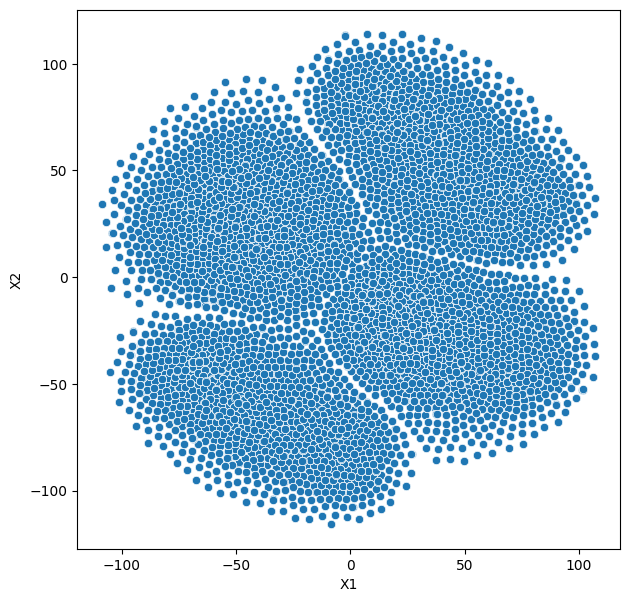

In [ ]:
# Fitting t-SNE with number of components equal to 2
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 40)

data_climate_tsne = tsne.fit_transform(data_climate_scaled)

# Converting the embeddings to a dataframe
data_climate_tsne = pd.DataFrame(data_climate_tsne, columns = ["X1", "X2"])

# Scatter plot for two components
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'X1', y = 'X2', data = data_climate_tsne)

plt.show()

**Observations:**

- We can clearly see **4 groups in the data**.
- Let's **label these 4 groups** using the values of the X1 and X2 axes.

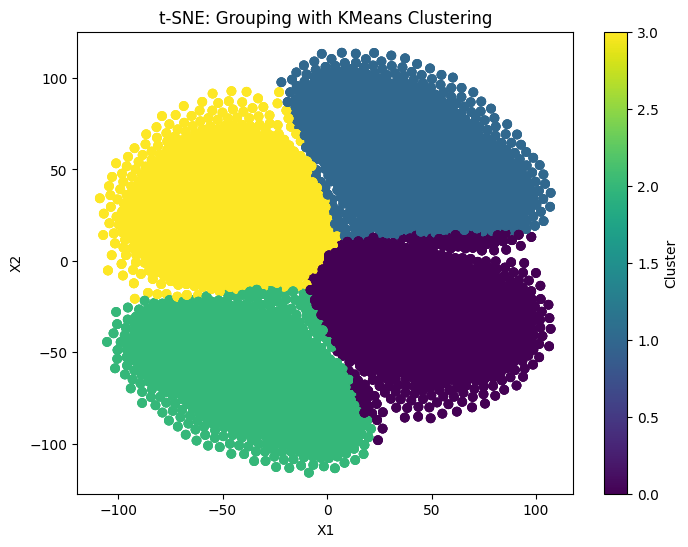

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Perform KMeans clustering to identify 4 groups using data_climate_tsne which has X1 and X2 columns
kmeans = KMeans(n_clusters=4, random_state=42)
data_climate_tsne['Cluster'] = kmeans.fit_predict(data_climate_tsne[['X1', 'X2']]) #Fit and predict on data_climate_tsne

# Plot the groups with the assigned colors
plt.figure(figsize=(8, 6))
plt.scatter(data_climate_tsne['X1'], data_climate_tsne['X2'], c=data_climate_tsne['Cluster'], cmap='viridis', label='Cluster') #Use data_climate_tsne for plotting
plt.xlabel('X1') #Change x-axis label
plt.ylabel('X2') #Change y-axis label
plt.title('t-SNE: Grouping with KMeans Clustering') #Change title to reflect t-SNE
plt.colorbar(label='Cluster')
plt.show()

**Now, let's visualize the properties of these four groups with respect to all the numeric variables in the data.**

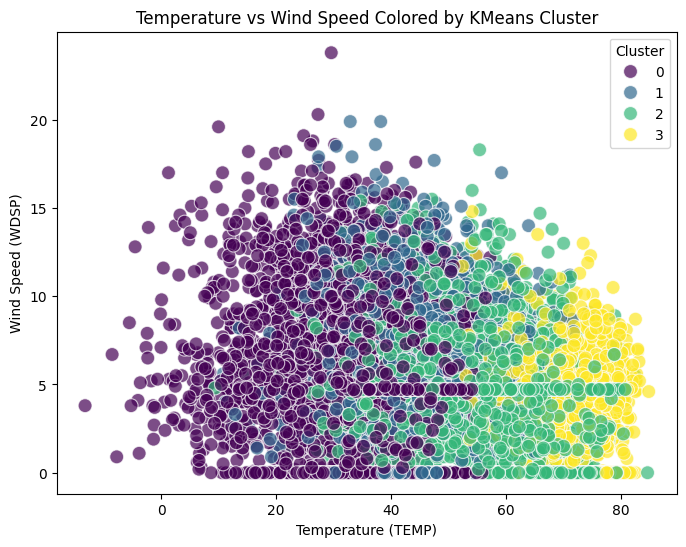

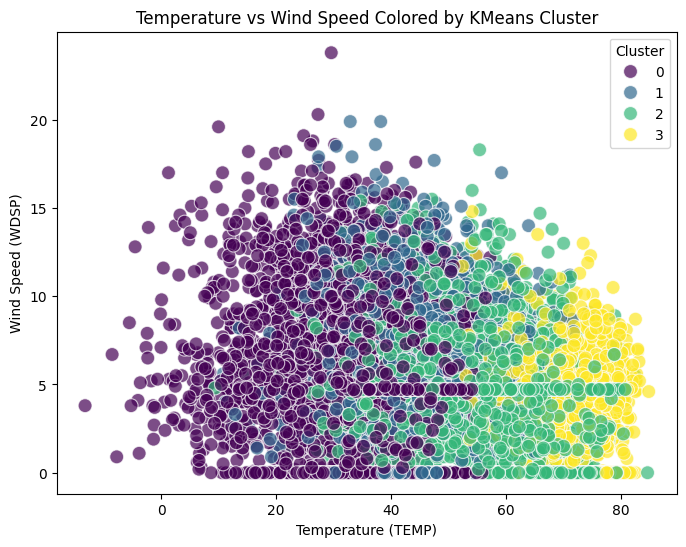

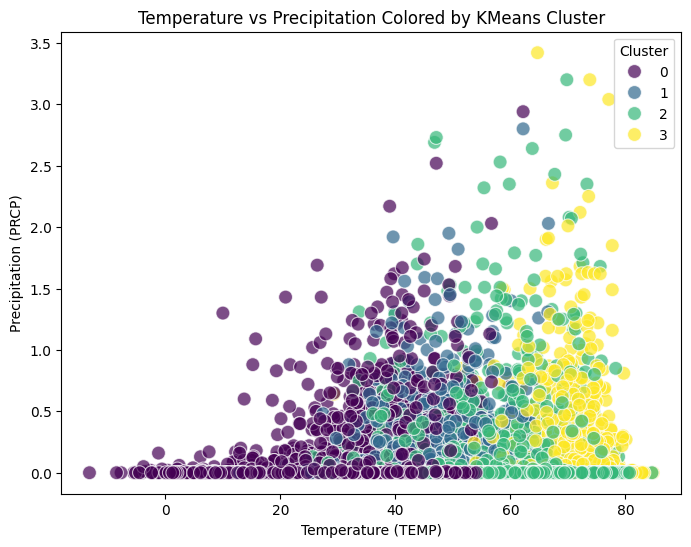

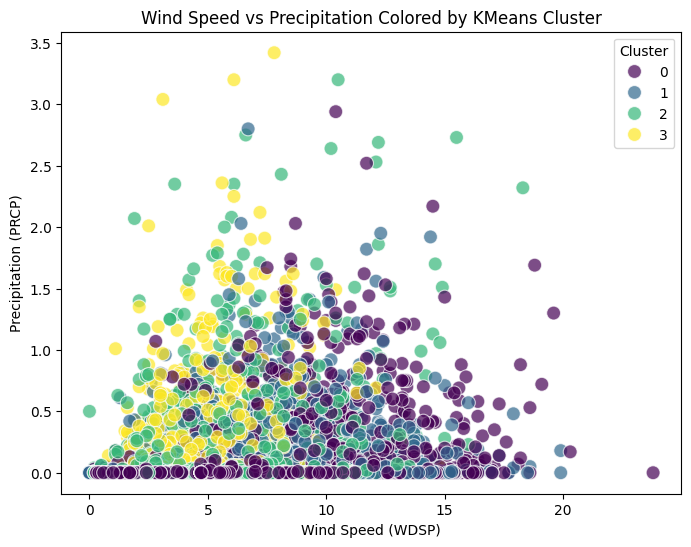

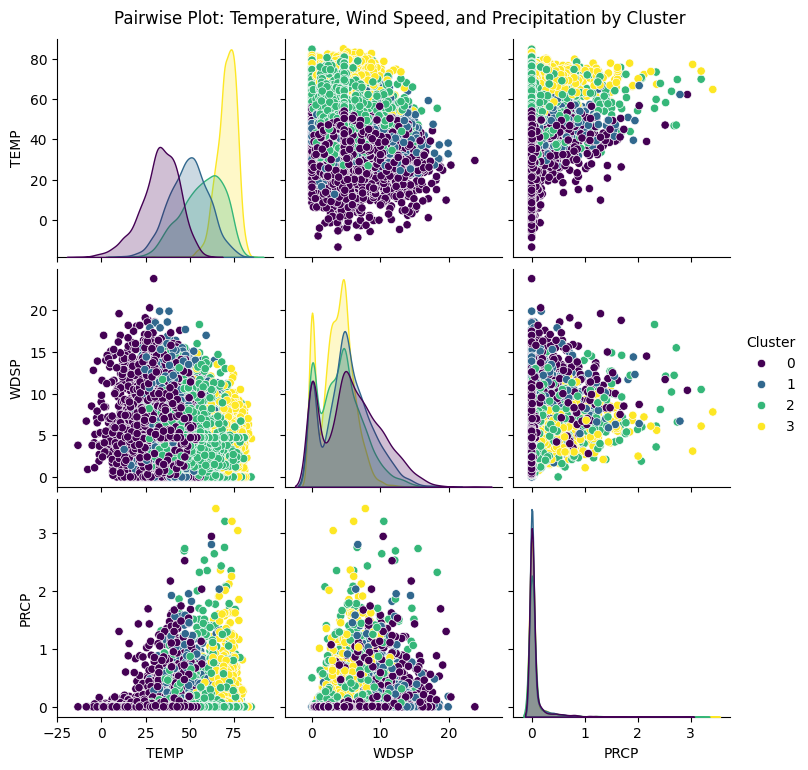

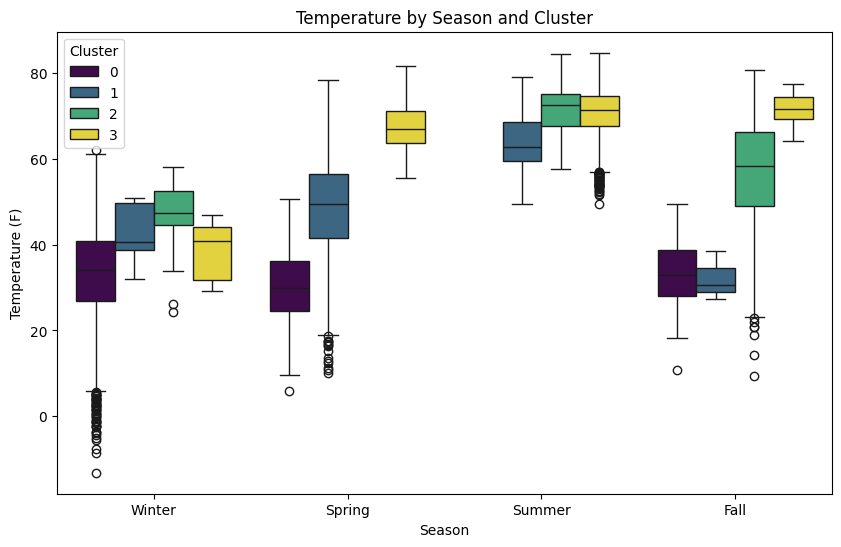

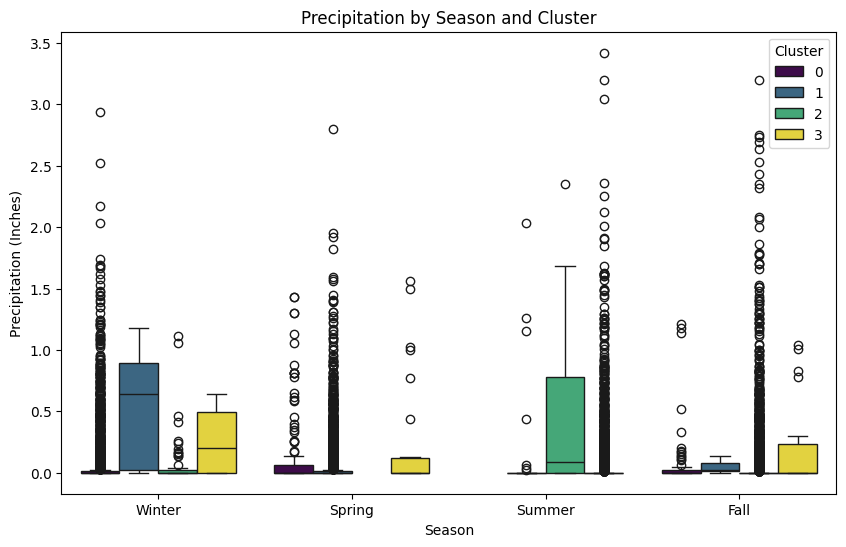

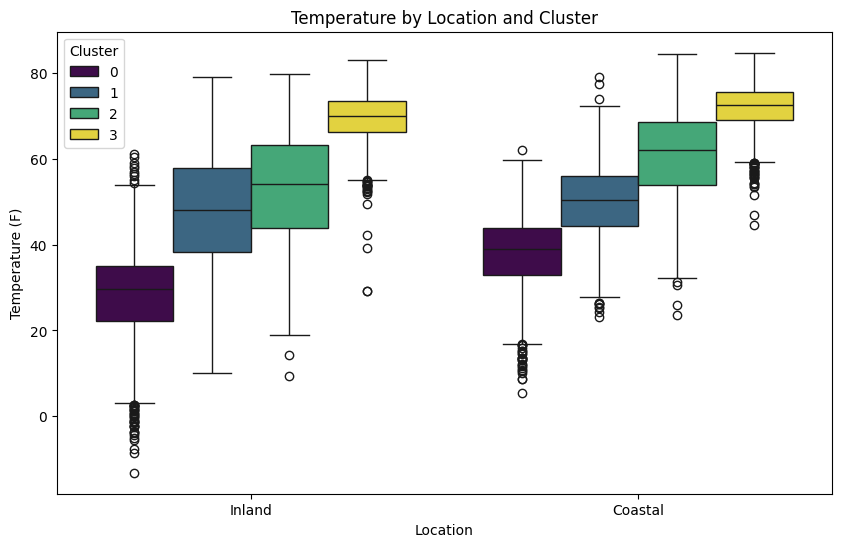

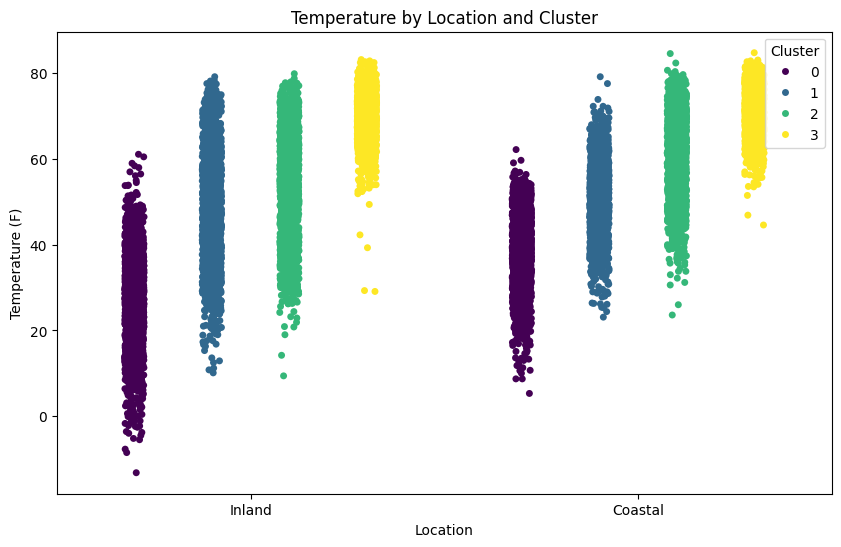

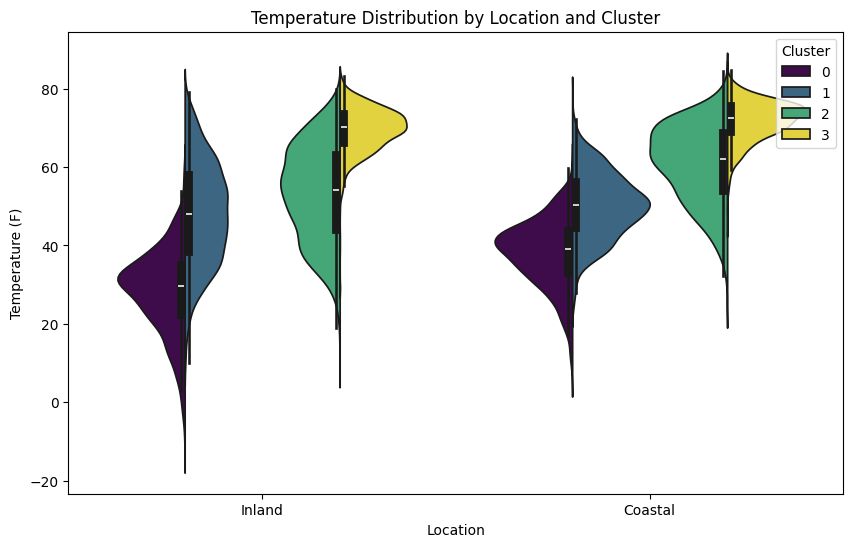

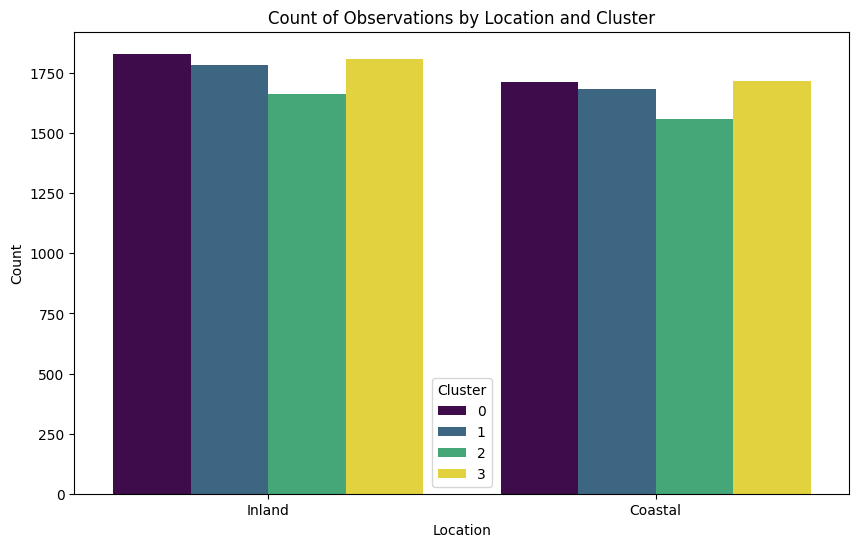

In [ ]:
# Create a scatter plot with temperature and windspeed, color-coded by clusters
plt.figure(figsize=(8, 6))
# Access TEMP and WDSP from the original DataFrame, data_climate
# Use data_climate_tsne['Cluster'] which is where the cluster labels are stored for hue
sns.scatterplot(x=data_climate['TEMP'], y=data_climate['WDSP'], hue=data_climate_tsne['Cluster'], palette='viridis', s=100, alpha=0.7)

plt.title('Temperature vs Wind Speed Colored by KMeans Cluster')
plt.xlabel('Temperature (TEMP)')
plt.ylabel('Wind Speed (WDSP)')
plt.legend(title='Cluster')
plt.show()

# Create a scatter plot with temperature and windspeed, color-coded by clusters
plt.figure(figsize=(8, 6))
# Access TEMP and WDSP from the original DataFrame, data_climate
# Use data_climate_tsne['Cluster'] which is where the cluster labels are stored for hue
sns.scatterplot(x=data_climate['TEMP'], y=data_climate['WDSP'], hue=data_climate_tsne['Cluster'], palette='viridis', s=100, alpha=0.7)

plt.title('Temperature vs Wind Speed Colored by KMeans Cluster')
plt.xlabel('Temperature (TEMP)')
plt.ylabel('Wind Speed (WDSP)')
plt.legend(title='Cluster')
plt.show()

# Create a scatter plot with temperature and precipitation, color-coded by clusters
plt.figure(figsize=(8, 6))
# Use data_climate_tsne['Cluster'] for hue
sns.scatterplot(x=data_climate['TEMP'], y=data_climate['PRCP'], hue=data_climate_tsne['Cluster'], palette='viridis', s=100, alpha=0.7)

plt.title('Temperature vs Precipitation Colored by KMeans Cluster')
plt.xlabel('Temperature (TEMP)')
plt.ylabel('Precipitation (PRCP)')
plt.legend(title='Cluster')
plt.show()

# Create a scatter plot with wind speed and precipitation, color-coded by clusters
plt.figure(figsize=(8, 6))
# Use data_climate_tsne['Cluster'] for hue
sns.scatterplot(x=data_climate['WDSP'], y=data_climate['PRCP'], hue=data_climate_tsne['Cluster'], palette='viridis', s=100, alpha=0.7)

plt.title('Wind Speed vs Precipitation Colored by KMeans Cluster')
plt.xlabel('Wind Speed (WDSP)')
plt.ylabel('Precipitation (PRCP)')
plt.legend(title='Cluster')
plt.show()

# Create a pairplot for temperature, windspeed, and precipitation, color-coded by clusters
# Concatenate data_climate and data_climate_tsne['Cluster'] to have 'Cluster' column in the DataFrame
data_climate_with_cluster = pd.concat([data_climate[['TEMP', 'WDSP', 'PRCP', 'SEASON']], data_climate_tsne['Cluster']], axis=1) # Include 'SEASON' here
sns.pairplot(data_climate_with_cluster, hue='Cluster', palette='viridis', markers='o') # Use the concatenated DataFrame
plt.suptitle('Pairwise Plot: Temperature, Wind Speed, and Precipitation by Cluster', y=1.02)
plt.show()

# Boxplot for Temperature by Season and Cluster
plt.figure(figsize=(10, 6))
# Use data_climate_with_cluster for the boxplot as it contains 'Cluster' and 'SEASON'
sns.boxplot(x='SEASON', y='TEMP', hue='Cluster', data=data_climate_with_cluster, palette='viridis')
plt.title('Temperature by Season and Cluster')
plt.xlabel('Season')
plt.ylabel('Temperature (F)')
plt.legend(title='Cluster')
plt.show()

# Boxplot for Precipitation by Season and Cluster
plt.figure(figsize=(10, 6))
# Use data_climate_with_cluster for the boxplot as it contains 'Cluster' and 'SEASON'
sns.boxplot(x='SEASON', y='PRCP', hue='Cluster', data=data_climate_with_cluster, palette='viridis')
plt.title('Precipitation by Season and Cluster')
plt.xlabel('Season')
plt.ylabel('Precipitation (Inches)')
plt.legend(title='Cluster')
plt.show()

# Boxplot for Temperature by Location and Cluster
plt.figure(figsize=(10, 6))
# Use the original DataFrame 'data_climate' which contains 'LOCATION' column
# Merge 'Cluster' column from data_climate_tsne into data_climate
data_climate = data_climate.merge(data_climate_tsne[['Cluster']], left_index=True, right_index=True)
sns.boxplot(x='LOCATION', y='TEMP', hue='Cluster', data=data_climate, palette='viridis')
plt.title('Temperature by Location and Cluster')
plt.xlabel('Location')
plt.ylabel('Temperature (F)')
plt.legend(title='Cluster')
plt.show()

# Stripplot for Temperature by Location and Cluster
plt.figure(figsize=(10, 6))
# Use the original DataFrame 'data_climate' or merge 'LOCATION' into data_climate_with_cluster
# Here, I'm merging 'LOCATION' into data_climate_with_cluster
data_climate_with_cluster = data_climate_with_cluster.merge(data_climate['LOCATION'], left_index=True, right_index=True)
sns.stripplot(x='LOCATION', y='TEMP', hue='Cluster', data=data_climate_with_cluster, jitter=True, palette='viridis', dodge=True)
plt.title('Temperature by Location and Cluster')
plt.xlabel('Location')
plt.ylabel('Temperature (F)')
plt.legend(title='Cluster')
plt.show()

# Violin plot for Temperature by Location and Cluster
plt.figure(figsize=(10, 6))
sns.violinplot(x='LOCATION', y='TEMP', hue='Cluster', data=data_climate_with_cluster, split=True, palette='viridis')
plt.title('Temperature Distribution by Location and Cluster')
plt.xlabel('Location')
plt.ylabel('Temperature (F)')
plt.legend(title='Cluster')
plt.show()

# Count plot for the number of observations in each Cluster by Coastal/Inland
plt.figure(figsize=(10, 6))
# Use data_climate_with_cluster as it contains 'Cluster'
sns.countplot(x='LOCATION', hue='Cluster', data=data_climate_with_cluster, palette='viridis')
plt.title('Count of Observations by Location and Cluster')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()


**Observations:**
- There are four groups in the data. Each group has a different set of characteristics.

- **Group 1 represents hot and humid areas**. As there is less variability in the pressure, the wind speed is low. Higher humidity is an indication of rain which has the potential to wash away atmospheric pollution, resulting in low levels of pollutants - fine particulate matter and hydrocarbons.

- Group 2 represents areas with medium humidity and temperature with low pressure and wind speed. The level of pollutants is medium. These might be **developing urban areas** where the Ozone (O3) concentration is medium to high, resulting in comparatively higher solar radiation.

- Group 3 is the largest and represents low-humidity and high-temperature areas. As the variability in pressure is high, the wind speed is high. If the wind is blowing towards an urban area from an industrial area then pollution levels are likely to be higher in the town or city than if the air is blowing from another direction, for example, open farmland. These might be **developed urban areas** as they have the highest level of Ozone pollutant and solar radiation, which could be a result of pollutants emitted by cars, power plants, etc.

- Group 4 represents **industrial areas** as it has a very high concentration of hydrocarbons, which are generally a result of fuel combustion. These areas have a high level of fine particulate matter and other pollutants. As there is less variability in air pressure, the wind speed is low.

In [ ]:
# Install nbcconvert to convert file to html and
!pip install nbconvert

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Convert notebook from .ipynb to .html
!jupyter nbconvert --to html '/content/drive/My Drive/Climate Data Analysis.ipynb' --output 'Climate Data Analysis.html'

# List all files in current directory
!ls

# Make the .html file accessible in Google Drive
!cp 'Climate Data Analysis.html' '/content/drive/My Drive/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] WARNING | pattern '/content/drive/My Drive/Climate Data Analysis.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivale